In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('amazon_alexa.tsv.txt',delimiter='\t')
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data.shape

(3150, 5)

In [4]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
ratings = data['rating'].value_counts()
numbers = ratings.index
quality = ratings.values

In [7]:
print(ratings)

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


In [8]:
numbers

Int64Index([5, 4, 1, 3, 2], dtype='int64')

In [9]:
quality

array([2286,  455,  161,  152,   96], dtype=int64)

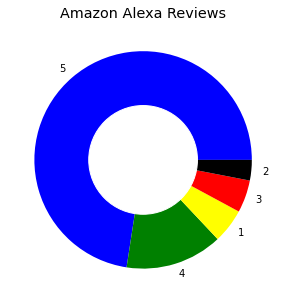

In [12]:
custom_color = ["blue","green","yellow","red","black"]
plt.figure(figsize=(5,5))
plt.pie(quality,labels=numbers,colors=custom_color)
central_circle = plt.Circle((0,0),0.5,color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews")
plt.show()

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["neutral"]  = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]

In [14]:
data.head()

,rating,date,variation,verified_reviews,feedback,positive,negative,neutral
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.692,0.000,0.308
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.807,0.000,0.193
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.114,0.102,0.784
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.383,0.000,0.617
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,0.000,1.000


In [15]:
x = sum(data["positive"])
y = sum(data["negative"])
z = sum(data["neutral"])
def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>c) and (b>a):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x,y,z)        

Neutral 🙂 


In [16]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1035.4579999999983
Negative:  96.79999999999995
Neutral:  1936.740999999996
